In [593]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [594]:
data = pd.read_csv('insurance.csv')
df = data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [596]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [597]:
df.shape

(1338, 7)

In [598]:
df.duplicated().sum()

1

In [599]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [600]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [601]:
correlation = df.corr() 
correlation

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


#DATA VISULATION

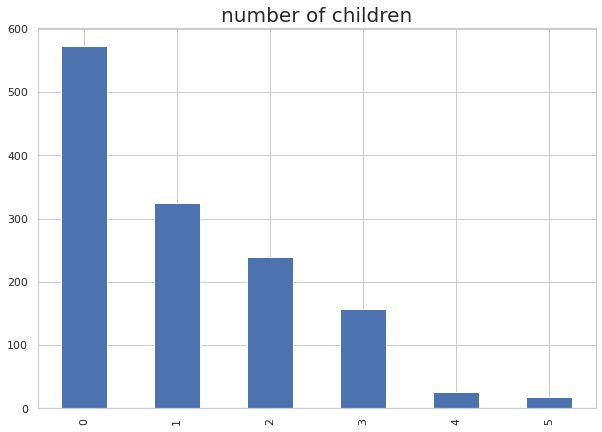

In [602]:
plt.figure(figsize=(10,7))
df["children"].value_counts().plot.bar()
plt.title('number of children', fontsize=20)
plt.show()


In [603]:
df["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

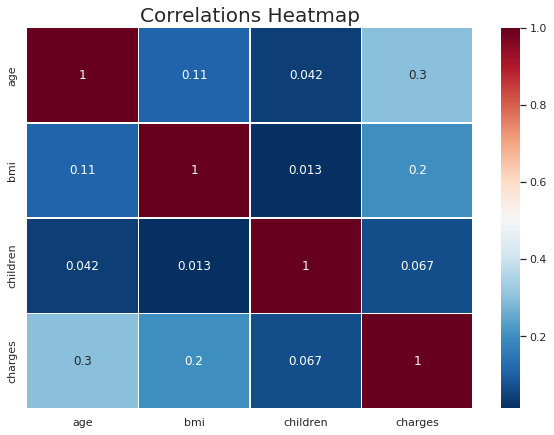

In [604]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True,cmap = "RdBu_r", linewidths=.3)
plt.title('Correlations Heatmap', fontsize=20)
plt.show()

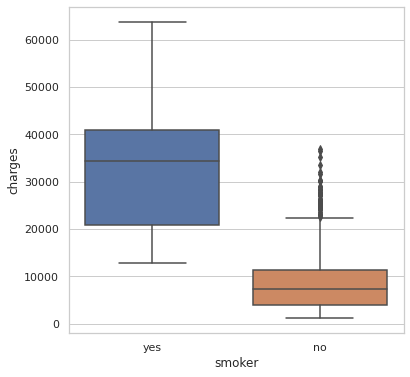

In [605]:
def boxplot(x,y):
    sns.boxplot(x=x,y=y)
plt.figure(figsize=(6,6))
boxplot(df['smoker'],df['charges'])

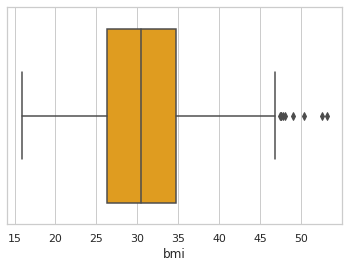

In [606]:
sns.boxplot(x = df.bmi, color="orange")

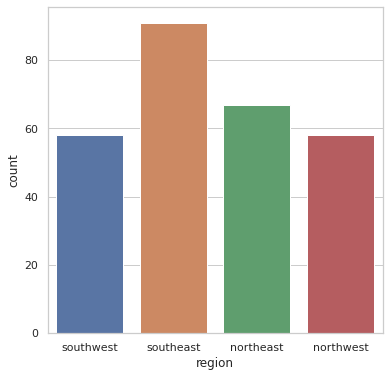

In [607]:
def countplot(x):
    sns.countplot(x=x)

# the ratio of smokers by region
plt.figure(figsize=(6,6))
countplot(df.loc[df['smoker']=='yes']['region'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


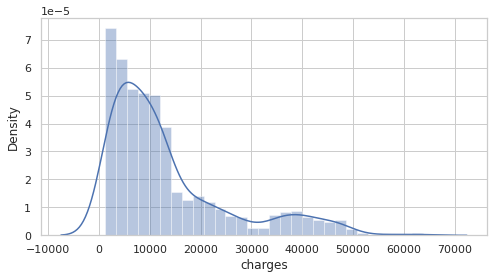

In [608]:
plt.figure(figsize=(8, 4))
sns.distplot(df["charges"])

In [609]:
df.groupby("region")["children"].value_counts()

region     children
northeast  0           147
           1            77
           2            51
           3            39
           4             7
           5             3
northwest  0           131
           1            74
           2            66
           3            46
           4             6
           5             1
southeast  0           157
           1            95
           2            66
           3            35
           5             6
           4             5
southwest  0           138
           1            78
           2            57
           3            37
           5             8
           4             7
Name: children, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


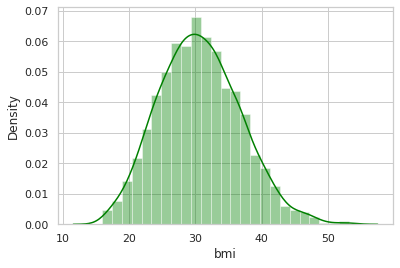

In [610]:
sns.distplot(df["bmi"], color="green")

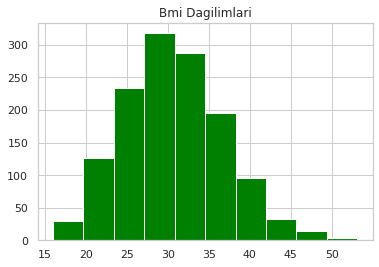

In [611]:
plt.hist(df['bmi'],color = 'green')
plt.title("Bmi Dagilimlari")
plt.show()

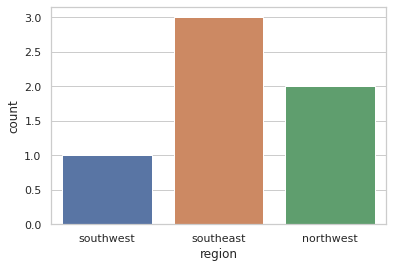

In [612]:
# number of children by region
countplot(df.loc[df.children.value_counts().index]['region'])
plt.show()

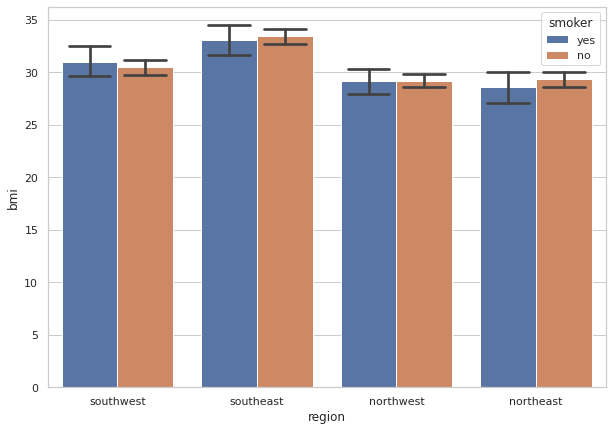

In [613]:
plt.figure(figsize=(10, 7))
sns.barplot(x="region", y="bmi", hue="smoker", data=df, capsize=.3)

In [614]:
df.children.value_counts().index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

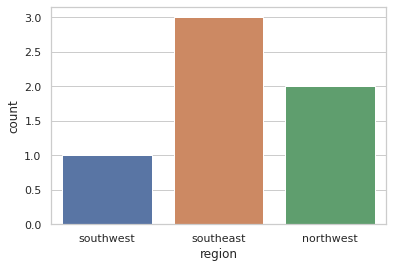

In [615]:
# number of children by region
countplot(df.loc[df.children.value_counts().index]['region'])
plt.show()

#Preprocessing


In [616]:
def Label_Encoding(column_name):
  le = LabelEncoder()
  df[column_name] = le.fit_transform(df[column_name])

In [617]:
Label_Encoding("smoker")
Label_Encoding("sex")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [618]:
one_hot = pd.get_dummies(df['region'])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [619]:
df = pd.concat([df,one_hot], axis=1)
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1


In [620]:
df.drop("region", axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [621]:
df.dtypes

age            int64
sex            int64
bmi          float64
children       int64
smoker         int64
charges      float64
northeast      uint8
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object

In [622]:
X=df.drop("charges", axis=1)
y=df["charges"]

#Future Scaling

In [623]:
# normalization witg min-max scaler 

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [624]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Model Selection


In [625]:
lin_reg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()
ridge_reg = Ridge()

In [626]:
# calculating score by cross validation
lin_reg_scores = cross_val_score(lin_reg, X_train, y_train, scoring= 'neg_mean_squared_error' , cv=10)

In [627]:
lin_reg_scores

array([-46079755.64579754, -46040525.9479515 , -25235676.46022379,
       -39882874.93990523, -34255562.84566608, -32923964.93285098,
       -45632208.99767294, -30439695.48908477, -39259538.45904237,
       -36227562.12666146])

In [628]:
DecTree_Scores = cross_val_score(DecTree, X_train, y_train, scoring= 'neg_mean_squared_error' , cv=10)

In [629]:
DecTree_Scores

array([-37581389.96853504, -51504255.82140109, -38112172.58036545,
       -57770480.07044287, -67493894.42419145, -21018583.59111996,
       -52787579.72351679, -43594082.65198621, -57782956.10715925,
       -31707842.24033338])

In [630]:
RandForest_Scores = cross_val_score(RandForest, X_train, y_train, scoring= 'neg_mean_squared_error' , cv=10)

In [631]:
RandForest_Scores

array([-26675819.54353482, -30469640.14505165, -17875466.41027522,
       -28483460.67571399, -29203753.46732912, -15901512.38362736,
       -28193800.0901609 , -16778973.49089933, -29803541.74727714,
       -22998947.49782504])

In [632]:
SVM_scores = cross_val_score(SVM, X_train, y_train, scoring= 'neg_mean_squared_error' , cv=10)

In [633]:
SVM_scores

array([-1.67548289e+08, -1.64675809e+08, -1.09430260e+08, -1.99103134e+08,
       -1.47982864e+08, -1.14609156e+08, -1.40344498e+08, -1.48180813e+08,
       -1.44779027e+08, -1.65548229e+08])

In [634]:
ridge_reg_scores = cross_val_score(ridge_reg, X_train, y_train, scoring= 'neg_mean_squared_error' , cv=10)

In [635]:
ridge_reg_scores


array([-46296971.3916906 , -46041698.51996009, -25282808.16671628,
       -40103206.61452916, -34895656.58347633, -32425499.70564863,
       -45212937.11473949, -30415129.32338316, -39236767.1097937 ,
       -36197642.73973249])

In [636]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores : {scores}
  Mean : {scores.mean()}
  Standart Deviation : {scores.std()}
  """
  )


In [637]:
score_display(lin_reg_scores)


  RMSE Scores : [6788.20710098 6785.31693791 5023.5123629  6315.28898309 5852.82520204
 5737.94082689 6755.16165592 5517.2180933  6265.74324873 6018.933637  ]
  Mean : 6106.014804877896
  Standart Deviation : 560.6422987053528
  


In [638]:
score_display(DecTree_Scores)


  RMSE Scores : [6130.36621814 7176.64655821 6173.50569615 7600.68944705 8215.46678066
 4584.6028826  7265.50615742 6602.58151423 7601.51012018 5630.97169593]
  Mean : 6698.184707055261
  Standart Deviation : 1034.2366015937375
  


In [639]:
score_display(RandForest_Scores)


  RMSE Scores : [5164.8639424  5519.93117213 4227.9387898  5336.98985157 5404.04972843
 3987.67004448 5309.78343157 4096.21453185 5459.2620149  4795.72179112]
  Mean : 4930.242529823187
  Standart Deviation : 575.4999064223331
  


In [640]:
score_display(SVM_scores)


  RMSE Scores : [12944.04452387 12832.60725444 10460.89195375 14110.39100432
 12164.82073899 10705.56656931 11846.70833068 12172.954165
 12032.41568295 12866.55468379]
  Mean : 12213.695490708506
  Standart Deviation : 1022.668279693802
  


In [641]:
score_display(ridge_reg_scores)


  RMSE Scores : [6804.18778339 6785.40334247 5028.20128542 6332.70926338 5907.25457243
 5694.33926858 6724.05659663 5514.99132578 6263.92585443 6016.44768445]
  Mean : 6107.151697696021
  Standart Deviation : 559.9373789055346
  


## RandForest_Scores has lowest RMSE (Root Mean Squared Error). Therefore I will continue with that.

#Model Tuning

In [642]:
params = { 'n_estimators' : [3,10,20,50],  "n_jobs": [2,3,4,10]}

In [643]:
grid_s = GridSearchCV(RandForest, params, cv = 5, scoring= "neg_mean_squared_error")


In [644]:
grid_s.fit(X_train,y_train);

In [645]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 4}

#Predictions

In [646]:
predictions = grid_s.best_estimator_.predict(X_test)

In [647]:
y_test[0:10].values

array([ 8688.85885,  5708.867  , 11436.73815, 38746.3551 ,  4463.2051 ,
        9304.7019 , 38511.6283 ,  2150.469  ,  7345.7266 , 10264.4421 ])

In [648]:
comparison = pd. DataFrame({"Y test" : y_test[0:10].values, "predictions" : predictions[0:10]})
comparison

,Y test,predictions
0,8688.85885,10280.138236
1,5708.86700,8462.408014
2,11436.73815,12975.820270
3,38746.35510,43438.677510
4,4463.20510,5196.524432
5,9304.70190,9793.681667
6,38511.62830,39092.127312
7,2150.46900,2501.538377
8,7345.72660,9471.113467
9,10264.44210,11379.075917


#Evaluation


In [649]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR Squared Value: {r_squared}")

In [650]:
regression_evaluation(predictions)

Mean Absolute Error: 2564.7542495514926 
Mean Squared Error: 21301685.47405819 
Root Mean Squared Error: 4615.374900705054 
R Squared Value: 0.8840762856713463


#Finding the Confidence Interval %95 

In [651]:
confidence = 0.95
squared_errors = (predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc = squared_errors.mean(),
scale = stats.sem(squared_errors)))

array([3755.88507226, 5338.22988191])

##Model can predict with the error values between 3.746 and 5.325.